In [1]:
pip install seaborn

     |████████████████████████████████| 215 kB 3.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [3]:
# Load the digits dataset.
digits = load_digits()

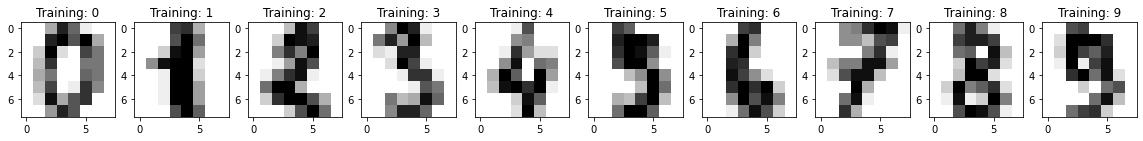

In [6]:
# Plot some digits from the data-set.
plt.figure(figsize=(20, 5))
for i in range(0,10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % digits.target[i])
plt.show()

# To apply a classifier on this data, we need to flatten the image, to turn the data in a
#(samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2,
shuffle=False)

In [35]:
parameters = {'weights':('uniform', 'distance'), 'n_neighbors':[1, 2, 3, 4, 5, 10, 15, 20]}

svc = KNeighborsClassifier()
clf = GridSearchCV(svc, parameters, cv=10, verbose=10, n_jobs=-1)
clf.fit(digits.data, digits.target)
print(clf.best_params_)
print(clf.best_score_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.933, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.994, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...... n_neighbors=1, weights=uniform, score=0.972, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.972, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.967, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.983, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s


[CV] ...... n_neighbors=1, weights=uniform, score=0.994, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.989, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.978, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.966, total=   0.1s
[CV] n_neighbors=1, weights=distance .................................


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s remaining:    0.0s


[CV] ..... n_neighbors=1, weights=distance, score=0.933, total=   0.1s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.994, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.972, total=   0.1s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.972, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.967, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.983, total=   0.1s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.994, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] .

[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    9.3s finished


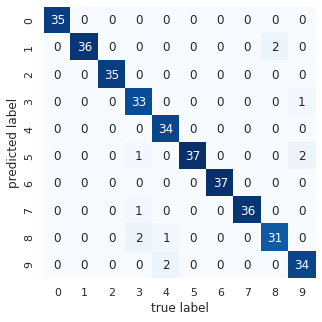

In [36]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1', '2', '3', '4', '5', '6', '7', '8', '9'], yticklabels=['0','1', '2', '3', '4', '5', '6', '7', '8', '9'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix.png', dpi=600)
plt.show()

In [37]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       0.97      0.89      0.93        37
           4       1.00      0.92      0.96        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.91      0.94      0.93        33
           9       0.94      0.92      0.93        37

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

